In [32]:
# Langkah 1: Import library yang dibutuhkan
import pandas as pd

# Baca dataset dari file yang diunggah
dataset_path = "spam.csv"
data = pd.read_csv(dataset_path, encoding='latin-1', on_bad_lines='skip')

# Tampilkan 5 baris pertama untuk memastikan file terbaca dengan benar
data.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:

#deskripsi setiap fitur
print("Deskripsi Statistik Fitur:")
print(data.describe())
print("")
# 2. Informasi tipe data dan jumlah non-null
print("\nInformasi Tipe Data dan Ukuran:")
data.info()
print("")
# Ukuran dataset
print("Ukuran dataset (baris, kolom):", data.shape)
print("")
# 4. Melihat tipe data per kolom secara eksplisit
print("\nTipe Data Per Kolom:")
print(data.dtypes)
print("")
# 5. Melihat target klasifikasi (misalnya kolom 'target' atau sesuaikan dengan nama target Anda)
print("\nDistribusi Target Klasifikasi:")
print(data['Category'].value_counts())
print("")
# Melihat target bertipe kategorikal atau numerik
print("\nTipe Data Target:", data['Category'].dtype)

Deskripsi Statistik Fitur:
       Category                 Message
count      5572                    5572
unique        2                    5157
top         ham  Sorry, I'll call later
freq       4825                      30


Informasi Tipe Data dan Ukuran:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Ukuran dataset (baris, kolom): (5572, 2)


Tipe Data Per Kolom:
Category    object
Message     object
dtype: object


Distribusi Target Klasifikasi:
Category
ham     4825
spam     747
Name: count, dtype: int64


Tipe Data Target: object


/tmp/ipython-input-34-4008604849.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=data, palette='Set2')


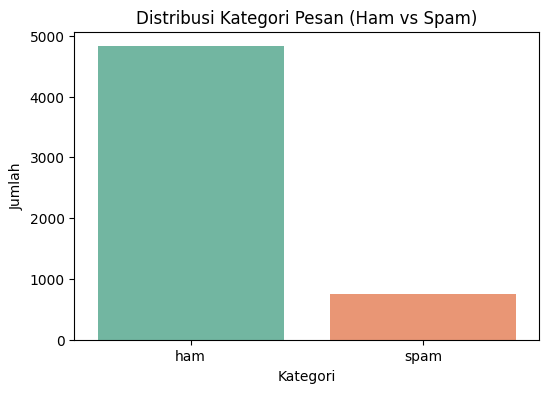

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi distribusi kelas (ham vs spam)
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=data, palette='Set2')
plt.title("Distribusi Kategori Pesan (Ham vs Spam)")
plt.xlabel("Kategori")
plt.ylabel("Jumlah")
plt.show()

In [35]:
print("Pesan dengan panjang 0:")
print((data['Message'].apply(len) == 0).sum())

print("Jumlah pesan kosong:", data['Message'].isnull().sum())


Pesan dengan panjang 0:
0
Jumlah pesan kosong: 0


In [36]:
print (data.shape)

(5572, 2)


In [37]:

# 2. Tambah fitur numerik untuk analisis
data['Message_Length'] = data['Message'].apply(len)
data['Word_Count'] = data['Message'].apply(lambda x: len(str(x).split()))
data['Upper_Case_Ratio'] = data['Message'].apply(
    lambda x: sum(1 for c in x if c.isupper()) / len(x) if len(x) > 0 else 0
)

data['Exclamation_Count'] = data['Message'].apply(lambda x: x.count('!'))

In [38]:
print (data.shape)

(5572, 6)


In [39]:
# 3. Mapping label numerik
data['Label'] = data['Category'].map({'ham': 0, 'spam': 1})

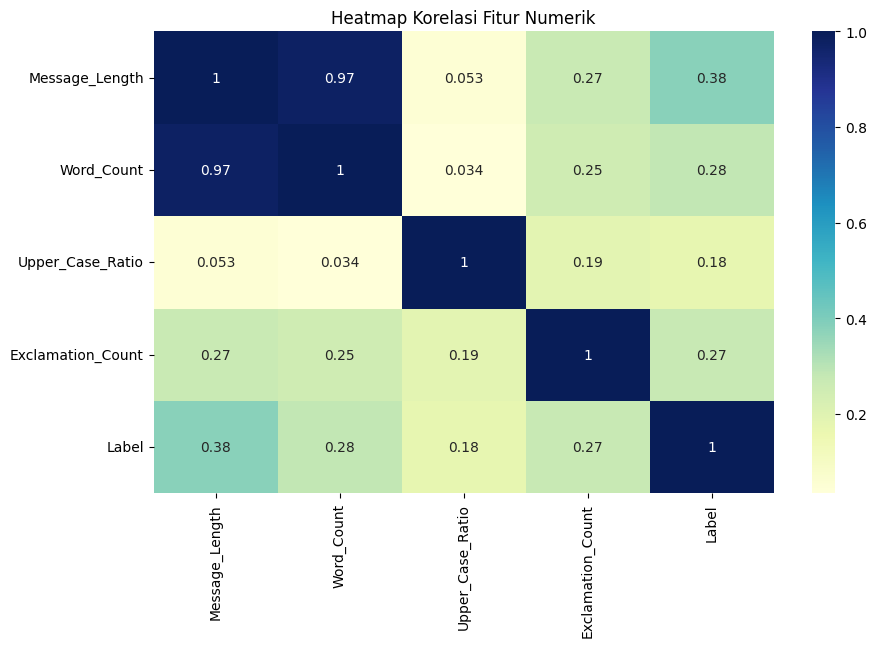

In [40]:
# 4. Korelasi fitur
plt.figure(figsize=(10,6))
sns.heatmap(
    data[['Message_Length', 'Word_Count', 'Upper_Case_Ratio', 'Exclamation_Count', 'Label']].corr(),
    annot=True,
    cmap='YlGnBu'
)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

In [41]:
# Cek distribusi kelas
kelas = data['Label'].value_counts(normalize=True) * 100
print("Distribusi Kelas (Persentase):\n", kelas.round(2))


Distribusi Kelas (Persentase):
 Label
0    86.59
1    13.41
Name: proportion, dtype: float64


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Cek dan hapus duplikasi jika ada
print("Jumlah data sebelum menghapus duplikat:", data.shape[0])
data = data.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", data.shape[0])

# 2. Isi nilai kosong jika ada
data['Message'] = data['Message'].fillna('')  # mengganti NaN dengan string kosong

# 3. Encoding target (sudah dilakukan, pastikan tetap ada)
data['Label'] = data['Category'].map({'ham': 0, 'spam': 1})

# 4. TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf.fit_transform(data['Message'])  # hasil: sparse matrix

# 5. Target
y = data['Label']

# 6. Split data (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 7. Verifikasi hasil split
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])
print("Distribusi label training:\n", y_train.value_counts(normalize=True).round(3))
print("Distribusi label testing:\n", y_test.value_counts(normalize=True).round(3))


Jumlah data sebelum menghapus duplikat: 5572
Jumlah data setelah menghapus duplikat: 5157
Jumlah data training: 4125
Jumlah data testing : 1032
Distribusi label training:
 Label
0    0.876
1    0.124
Name: proportion, dtype: float64
Distribusi label testing:
 Label
0    0.876
1    0.124
Name: proportion, dtype: float64


/tmp/ipython-input-42-2100305671.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Message'] = data['Message'].fillna('')  # mengganti NaN dengan string kosong
/tmp/ipython-input-42-2100305671.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Category'].map({'ham': 0, 'spam': 1})


In [47]:
print (data.shape)

(5157, 7)


In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan jumlah tetangga = 5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melatih model dengan data training
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

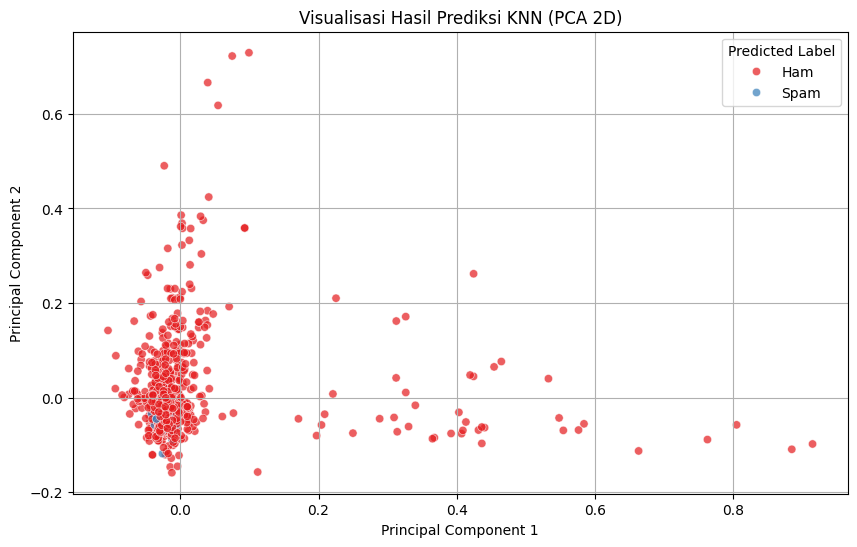

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduksi dimensi fitur test menjadi 2D (untuk visualisasi)
y_pred = knn_model.predict(X_test)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test.toarray())  # tf-idf harus diubah ke array
# Ubah label prediksi numerik ke string label
label_map = {0: 'Ham', 1: 'Spam'}
y_pred_str = [label_map[val] for val in y_pred]

# Plot dengan label string agar warnanya beda
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_str, palette='Set1', alpha=0.7)
plt.title("Visualisasi Hasil Prediksi KNN (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Predicted Label')
plt.grid(True)
plt.show()


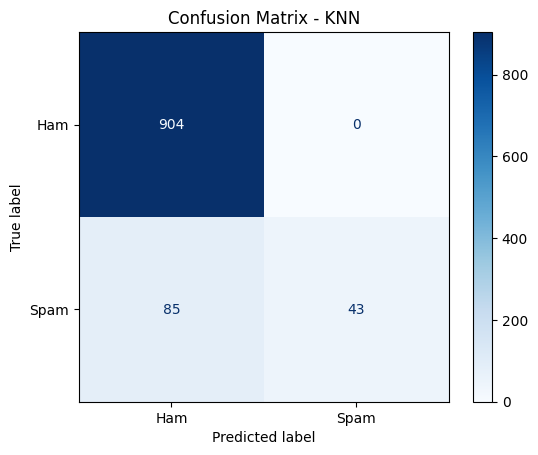

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


In [46]:
from sklearn.metrics import classification_report

# Tampilkan laporan klasifikasi lengkap
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))


=== Classification Report ===
              precision    recall  f1-score   support

         Ham       0.91      1.00      0.96       904
        Spam       1.00      0.34      0.50       128

    accuracy                           0.92      1032
   macro avg       0.96      0.67      0.73      1032
weighted avg       0.92      0.92      0.90      1032

